# STA365
## Homework 7

---

### Question 1

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).



1. We are given a linear regression model:

$$\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}, \quad \boldsymbol{\epsilon} \sim \mathcal{N}(0, \sigma^2 \mathbf{I})$$

and likelihood of 

$$p(y∣ \beta , \sigma^2)\propto \exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$$

and prior of 
$$p(\beta) = \mathcal{N}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$$

Using the Bayes' Rule, we have the posterior of $\boldsymbol{\beta}$ is proportional to the product of the likelihood and the prior where
$$
\begin{align}
p(\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2) 
& \propto p(\mathbf{y} \mid \boldsymbol{\beta}, \sigma^2) \times p(\boldsymbol{\beta}) \\
& \propto \exp \left( -\frac{1}{2 \sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right) \times \exp \left( -\frac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_{\beta}^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) \right)
\end{align}$$

By completing the square, we conclude that the posterior distribution of $\boldsymbol{\beta}$ is multivariate normal:
$$\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2 \sim \mathcal{N}(\boldsymbol{\beta}_n, \boldsymbol{\Sigma}_n)$$ 
where
$$\boldsymbol{\Sigma}_n = \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{X} + \boldsymbol{\Sigma}_{\beta}^{-1} \right)^{-1},
$$
$$
\boldsymbol{\beta}_n = \boldsymbol{\Sigma}_n \left( \frac{1}{\sigma^2} \mathbf{X}^\top \mathbf{y} + \boldsymbol{\Sigma}_{\beta}^{-1} \boldsymbol{\beta}_0 \right)$$

Thus, the posterior for $\beta$ follows a multivariate normal distribution.

2. Assume an inverse-gamma prior on $\sigma^2$:
$$\sigma^2 \sim \text{Inv-Gamma}(\alpha^*, \beta^*)$$

The likelihood is:
$$p(\mathbf{y} \mid \boldsymbol{\beta}, \sigma^2) \propto (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2 \sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right).$$

Combining the prior and the likelihood, the posterior for $\sigma^2$ is:
$$p(\sigma^2 \mid \mathbf{y}, \mathbf{X}, \boldsymbol{\beta}) \propto (\sigma^2)^{-n/2} \exp \left( -\frac{1}{2 \sigma^2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right) \times (\sigma^2)^{-(\alpha^* + 1)} \exp \left( -\frac{\beta^*}{\sigma^2} \right)$$

Simplifying:
$$\propto (\sigma^2)^{-(\alpha^* + n/2 + 1)} \exp \left( -\frac{1}{\sigma^2} \left( \frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + \beta^* \right) \right).
$$

Thus, the posterior distribution of $\sigma^2$ is inverse-gamma:
$$\sigma^2 \mid \mathbf{y}, \mathbf{X}, \boldsymbol{\beta} \sim \text{Inv-Gamma} \left( \alpha^* + \frac{n}{2}, \beta^* + \frac{1}{2} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) \right)$$


---
### Question 2

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma` 
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

Answer:

In [2]:
import pandas as pd

# Load CSV from your computer (put CSV in same folder or give full path)
df = pd.read_csv('heart.csv')

# Show first few rows
print(df.head())


# Let Age as predictor variable (X) and Cholestrol as response variable(y)
X = df[['Age']].values  # 2D array as required for design matrix
y = df['Cholesterol'].values  # 1D array


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 1)
(918,)


In [3]:
import pymc as pm
import numpy as np
import arviz as az

# Number of observations
n = X.shape[0]

with pm.Model() as model:
    # Prior on slope (beta) and intercept (alpha)
    beta = pm.Normal('beta', mu=0, sigma=1)
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    
    # Prior on error standard deviation
    sigma = pm.HalfNormal('sigma', sigma=10)
    
    # Expected value of outcome
    mu = alpha + beta * X.flatten()  # Flatten X to make it 1D
    
    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,53.369,9.141,36.886,71.180,0.166,0.119,3036.0,3514.0,1.0
beta,2.592,0.178,2.251,2.923,0.003,0.002,3094.0,3362.0,1.0
sigma,108.009,2.359,103.379,112.264,0.039,0.027,3716.0,3758.0,1.0


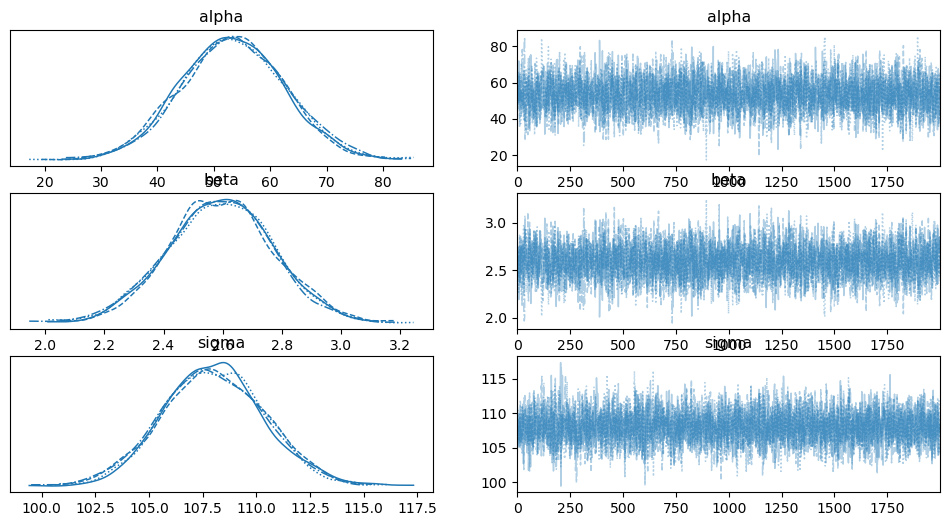

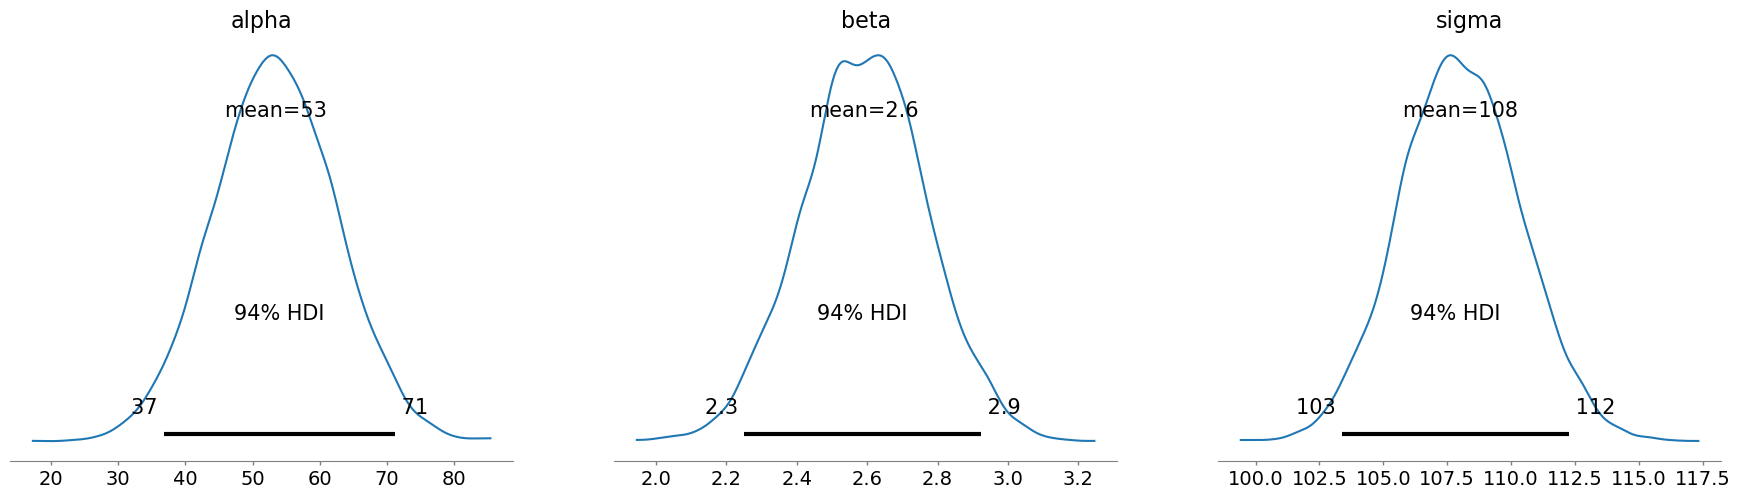

In [4]:
az.plot_trace(trace)
az.plot_posterior(trace)
az.summary(trace)

**Inference**

1. Trace table


The intercept, or alpha shows that at age 0, the estimated mean cholesterol level is about 53.44, but realistically since age = 0 may not make sense biologically. So the alpha only gives us a baseline reference with  94% HDI (credible interval) for alpha is [36.72, 69.16].

The slope or Beta indicates that for every unit increase in age, cholesterol increases on average by ~2.59 units. The 94% HDI is [2.28, 2.91], meaning we are 95% confident that the true effect of age lies in this range. Since the interval is entirely above 0, age positively affects cholesterol, and this effect is statistically credible.

Lastly, the Sigma or the standard deviation of the error (how much cholesterol deviates from the predicted line on average) is about 108, with a narrow HDI [103.70, 112.44], meaning model predictions vary around the regression line by ~108 units of cholesterol.

There is also a good effective sample sizes with each of them above 3000 which shows that the MCMC ran well and there is no convergence issues

2. Posterior Plot


The left column shows the Density and Posterior distribution which plots the posterior distributions for each parameter (alpha, beta and sigma). The bell-shaped curves indicate well-behaved, unimodal posteriors, which means that the MCMC is sampled properly. The dotted lines represent different chains which has some well overlapping , showing good convergence. The HDI is visualized as the thick part of the distribution at the bottom.

The right column which is the trace plots show time-series plots of the sampled values (iterations of MCMC). Since there is no trend or drift, this shows good mixing and convergence. The R-hat values which is 1.0 for all parameters (from summary) also shows  perfect convergence.



3. Mean Plot


The third section shows the mean values of each parameter where the alpha has a mean of 53 and 94% HDI which is in the interval [37, 69]. This means that we are 94% confident the intercept lies in this range. The beta has a mean of 2.6 with 94% HDI is [2.3, 2.9] which indicates that the age is positively affecting cholesterol.
Lastly, the sigma has a mean of 108 with 94% HDI in the inteval [104, 112] which shows the uncertainty in residual variation

**Conclusion**

There is a positive relationship between age and cholesterol as the cholesterol increases by ~2.6 units for every 1-year increase in age. This is a credible and statistically significant effect because the interval [2.3, 2.9] is fully above 0. There is also some uncertainty in baseline cholesterol (intercept), but the model is well-identified. Residual variation (sigma) is about 108 units, indicating moderate spread in cholesterol levels beyond age's effect. Lastly, there is a good model convergence since the trace plots and R-hat values show MCMC chains are mixed well so there is no sampling issues.

---
### Question 3

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$. 

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers" 
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

Answer:

In [8]:
import numpy as np

# Randomly select some rows and increase their cholesterol values significantly
np.random.seed(42)  # For reproducibility
random_indices = np.random.choice(df.index, size=5, replace=False)  # Pick 5 random rows
df.loc[random_indices, 'Cholesterol'] *= 3  # Increase their cholesterol by 3x

import pymc as pm
import arviz as az

# Assuming df is your DataFrame, and X and y are:
X = df[['Age']].values.flatten()  # Flatten to 1D array
y = df['Cholesterol'].values
n = len(y)  # Number of observations

with pm.Model() as robust_model:
    # Priors on intercept and slope
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    
    # Global precision (tau)
    tau = pm.Gamma('tau', alpha=2, beta=2)
    
    # Prior on ν if you want to estimate it (or fix it as a constant, e.g., 4)
    nu = pm.Exponential('nu', 1)  # Optional, flexible ν for robustness

    # Individual precisions for each data point (heteroscedasticity)
    tau_i = pm.Gamma('tau_i', alpha=nu/2, beta=nu/2, shape=n)

    # Linear predictor
    mu = alpha + beta * X

    # Individual sigmas (convert from precision)
    sigma_i = pm.Deterministic('sigma_i', pm.math.sqrt(1 / (tau * tau_i)))

    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma_i, observed=y)

    # Sampling
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, tau, nu, tau_i]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 22 seconds.


In [10]:
az.summary(trace, var_names=["alpha", "beta", "tau", "nu"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,74.295,8.996,58.066,91.733,0.130,0.092,4778.0,5572.0,1.00
beta,2.820,0.165,2.516,3.130,0.002,0.001,6636.0,6178.0,1.00
tau,0.000,0.000,0.000,0.000,0.000,0.000,807.0,1750.0,1.01
nu,1.706,0.168,1.400,2.019,0.007,0.005,636.0,1500.0,1.01


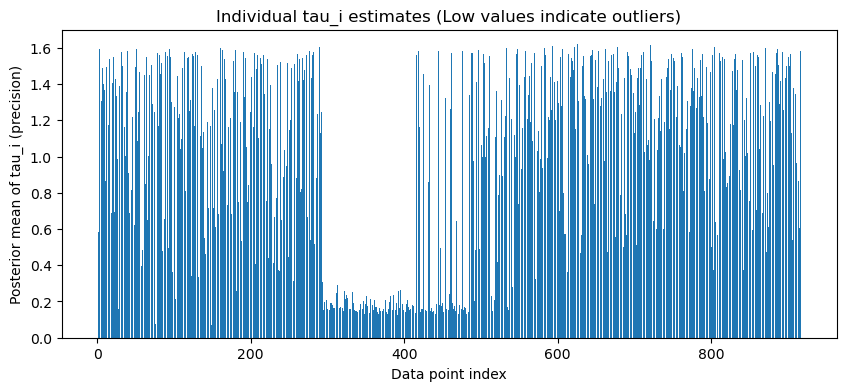

In [9]:


#Detect the outliers
import matplotlib.pyplot as plt

# Extract tau_i mean from posterior
tau_i_means = trace.posterior['tau_i'].mean(dim=["chain", "draw"]).values

# Plot tau_i for each observation
plt.figure(figsize=(10, 4))
plt.bar(range(n), tau_i_means)
plt.xlabel('Data point index')
plt.ylabel('Posterior mean of tau_i (precision)')
plt.title('Individual tau_i estimates (Low values indicate outliers)')
plt.show()


**Inference**

1. Trace table


The $\alpha$ or Intercept has a posterior mean of 74.3 with 94% HDI in the interval [58.1, 91.7]. This means that theoretically,  at the age of 0, the expected cholesterol is around 74 units. Hence, the Intercept is not as significant unless the data for age = 0 is meaningful.

The $\beta$, or Slope of Age on Cholesterol, has a Posterior mean of 2.82 and standard deviation of 0.165 with the 94% HDI lies between [2.52, 3.13] which is entirely positive. This shows that for each one-year increase in age, the cholesterol increases by about 2.82 units on average, which is a statistically credible (significant) positive effect since HDI does not include 0.

The $\tau$, or Global precision, has a Mean and HDI of 0. This suggests that the global precision (shared error variance) has shrunk to nearly zero because the model is delegating variance to individual $\tau_i$'s. Hence, indicating that the model thinks each observation has its own variability (very flexible, robust). This happens when heteroscedasticity or outliers are present, so $\tau_i$'s carry the load of variance.

Lastly, the $\nu$ (Robustness, degrees of freedom for $\tau_i$) has a very low Posterior mean which is 1.71 with the 94% HDI between [1.40, 2.02]. The very low $\nu$ (near 1) indicates that the model assumes heavy-tailed errors since there is a high robustness to outliers. This is a key result indicating that the model is adapting to outliers by "down-weighting" extreme points via large variances (small $\tau_i$).

Overall, the Convergence Diagnostics show the value of R-hat around 1.00 and 1.01 which means there is a great Great convergence. There is also a high ESS value for $\alpha$ and $\beta$ which indicates a reliable posterior estimates and lower ESS for $\tau$ and $\nu$ which indiactes that it is difficult to estimate due to heavy-tailed nature but still acceptable.

2. Posterior distribution of $\tau_i$

The plot for the posterior distribution of $\tau_i$ has a Y-axis that indicates the Posterior mean of $\tau_i$ and X-axis which indicates data point index. The low $\tau_i$ values (between 0 to 0.2) indicates that the observations has very high variance ($\sigma_i^2$) which are most likely the outliers. On the other hand, the high $\tau_i$ values (between 1.0 to 1.6) shows the regular data points with reasonable variance of the non-outliers. There is a clear clusters of points with very low $\tau_i$ (around indices 300–450), meaning the model identifies these as possible outliers.


**Conclusion**

This is a fitted Robust Bayesian Linear Regression model that accounts for outliers via individual variance terms 
$\tau_i$ method. The posterior mean for the slope ($\beta$) is 2.82 (94% HDI: 2.52, 3.13), indicating a statistically credible positive association between age and cholesterol. The posterior distribution for the robustness parameter $\nu$ is centered around 1.71, suggesting that the model adopted heavy-tailed errors to mitigate the influence of outliers. The global precision $\tau$ effectively shrank to zero, meaning the model relies on observation-specific variances. The posterior distribution of $\tau_i$ highlights several data points with very low precision (high variance), clearly identifying them as potential outliers. These results suggest that a robust modeling approach is necessary for this data to avoid biased inference from outlying points. MCMC diagnostics (R-hat ≈ 1.0, high ESS) confirmed good convergence and reliability of the posterior estimates.